In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset) :
    data = np.genfromtxt(file_name_dataset , delimiter =',', skip_header =1) . tolist ()
    N = len(data)
    
    tv_data = get_column(data, 0)

    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column ( data , 3)
    X = [ tv_data , radio_data , newspaper_data ]
    y = sales_data
    return X , y

In [38]:
X , y = prepare_data (r'E:\AIO\AIO_Homework\Data\advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


In [39]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    b = 0
    return w1, w2, w3, b

In [40]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [41]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

In [42]:
y_tmp = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_tmp)

1.0


In [43]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

In [44]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [45]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

# Compute gradient with respect to b (bias)
def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

In [46]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y =2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [47]:
# Update weight wi
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

# Update bias b
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

In [48]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [49]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [50]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

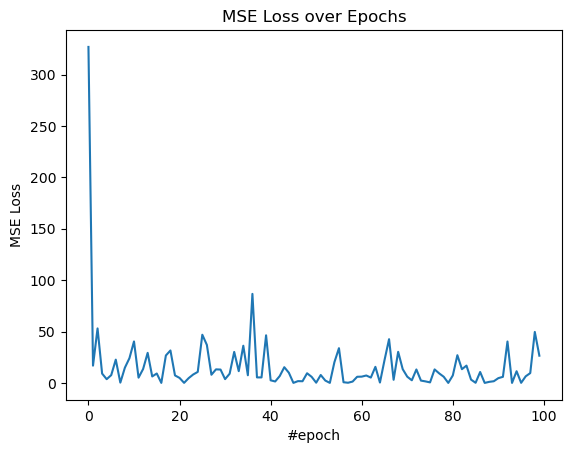

In [51]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=100, lr=1e-5)

plt.plot(losses[:100])
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs")
plt.show()

In [56]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print("Weights: w1 =", w1, ", w2 =", w2, ", w3 =", w3, ", b =", b)

Weights: w1 = 0.07405984066396477 , w2 = 0.15917360263437663 , w3 = 0.017561197559948935 , b = 0.13924260940219846


In [57]:
tv = 19.2
radio = 35.9
newspaper = 51.3

(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

sales = predict(tv, radio, newspaper, w1, w2, w3, b)

print(f'Predicted sales is {sales}')

Predicted sales is 8.176413319549823


In [58]:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

In [59]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [60]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y_hat, y)

            # Accumulate loss
            loss_total += loss

            # Compute gradient wi, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradient wi, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (After processing N samples) - Update parameters
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Logging
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

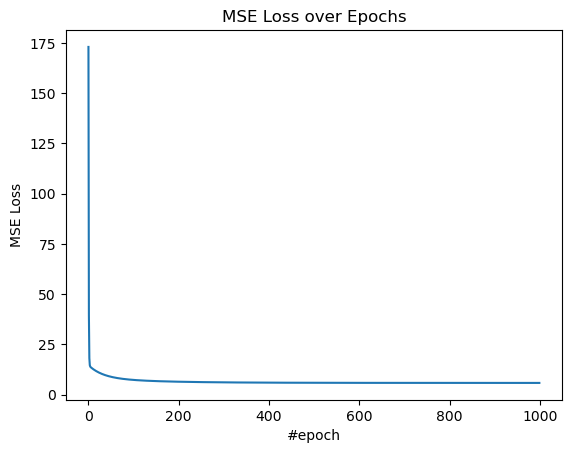

In [61]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print(losses)

plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs")
plt.show()

In [62]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X,
    y,
    epoch_max=1000,
    lr=1e-5
)

print(f'Weights: w1 = {w1}, w2 = {w2}, w3 = {w3}')

Weights: w1 = 0.06710990754044266, w2 = 0.15756173831487585, w3 = 0.029619799386084403


31.338878034644296


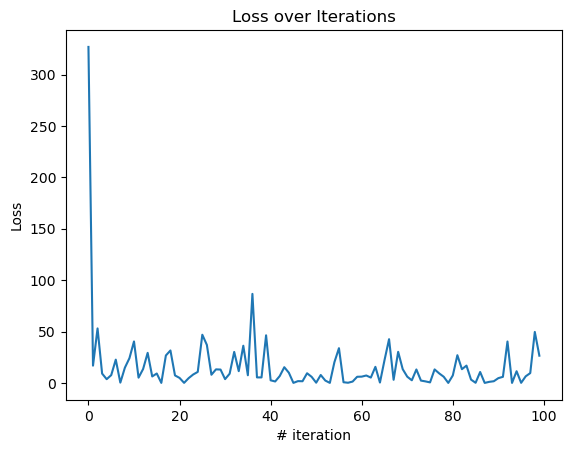

In [63]:
w1, w2, w3, b, losses = implement_linear_regression(X, y)

print(losses[9999])
plt.plot(losses[0:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()